# **Kütüphaneleri İçe Aktarma**

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

In [ ]:
# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Veri setinin okunması
df = pd.read_csv('Hotel Reservations.csv')

# **Exploratory Data Analysis**

In [ ]:
# Veri seti hakkında genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Sayısal sütunların istatistiksel özeti
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# Veri setinin boyutları
df.shape

(36275, 19)

In [ ]:
# İlk 5 satırın kontrol edilmesi
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Son 5 satırın kontrol edilmesi
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
# Eksik değer kontrolü
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
# Tüm featurelar
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# Featureların kaç farklı değer içerdiği kontrolü
df.nunique()

,0
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


In [ ]:
# Tekrar eden satırların (duplicate) kontrolü
duplic = df.duplicated().sum()
print(f"Tekrar eden kayıt sayısı: {duplic}")

Tekrar eden kayıt sayısı: 0


In [ ]:
# Mantıksal hata kontrolü: Hem yetişkin hem çocuk sayısının 0 olduğu kayıtlar mantıksızdır
filtre = (df['no_of_adults'] == 0) & (df['no_of_children'] == 0)
print(f"Hatalı kayıt sayısı: {len(df[filtre])}")

Hatalı kayıt sayısı: 0


In [ ]:
# Hedef değişkenin (Booking Status) dağılım oranları
df['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
Not_Canceled,0.672364
Canceled,0.327636


In [ ]:
# Kategorikal veriler
cat_columns = df.select_dtypes(include='object').columns.tolist()
print(cat_columns)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
# Nümerik veriler
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


# **Veri Görselleştirme**

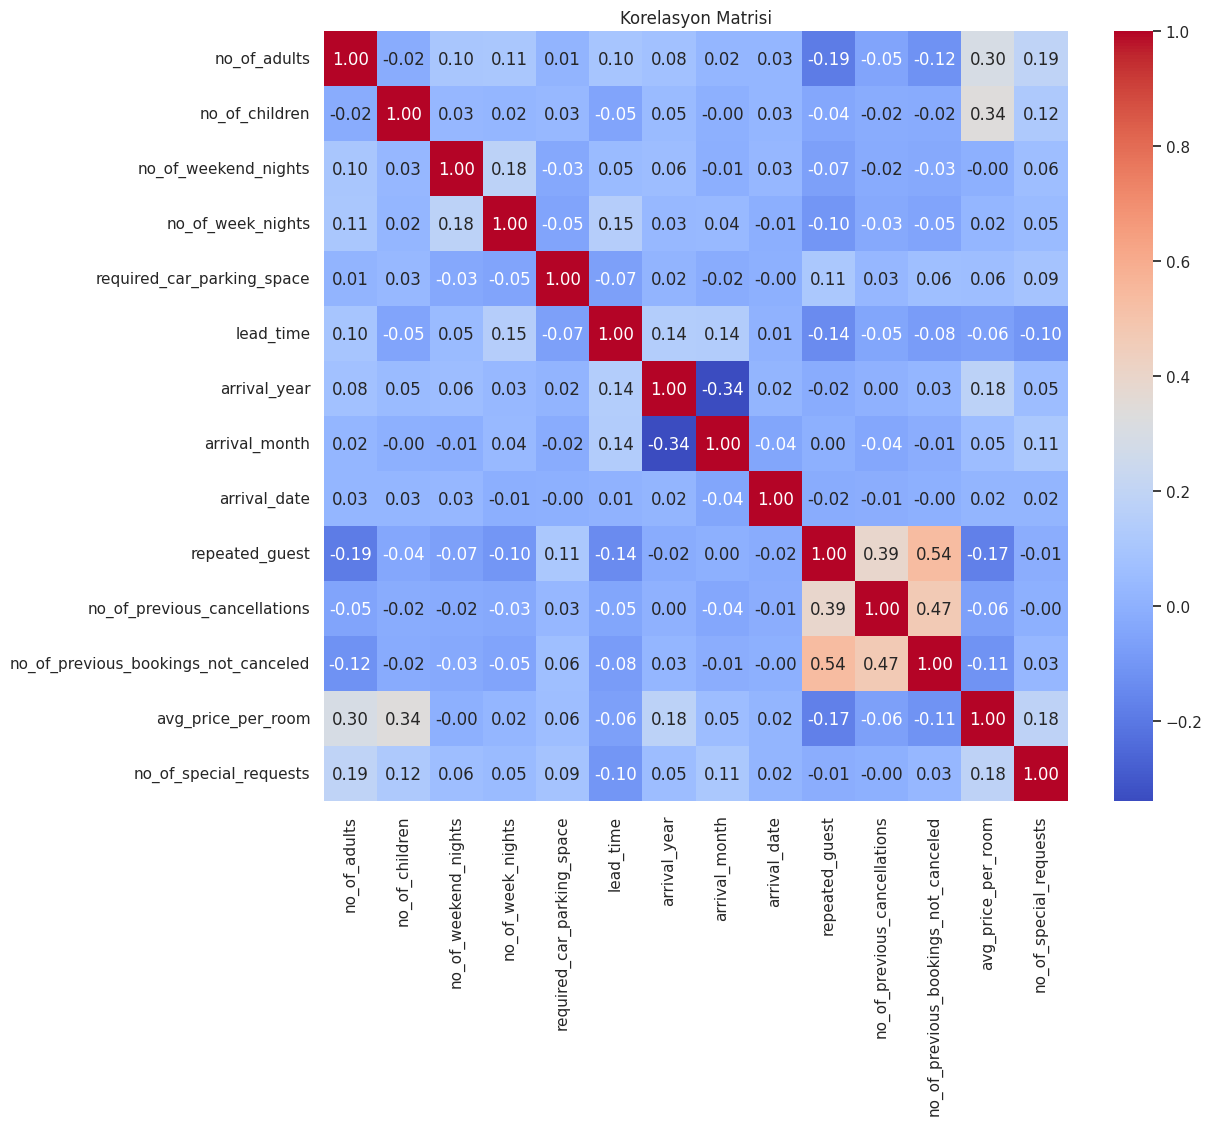

In [ ]:
# Sayısal değişkenler arasındaki korelasyon haritası
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

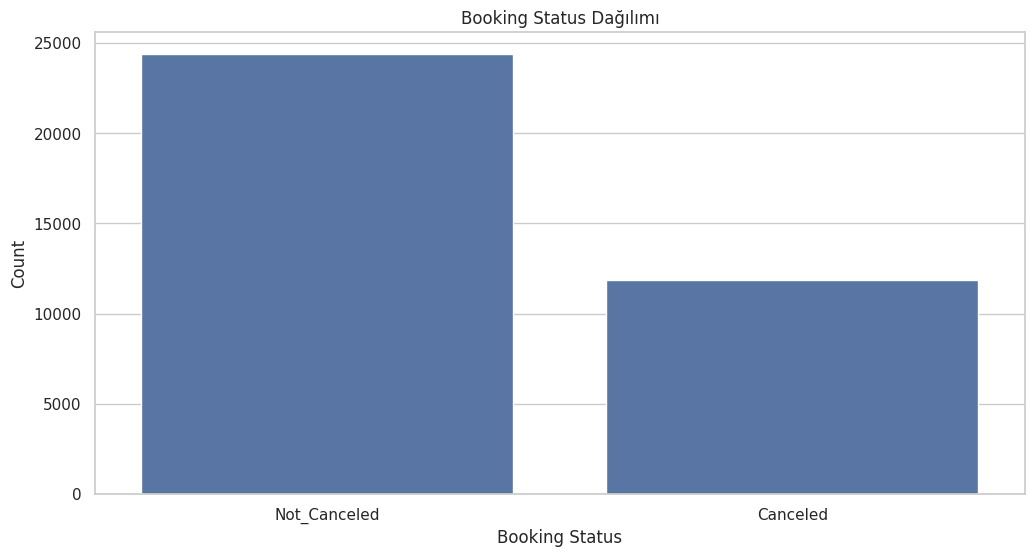

In [ ]:
# Rezervasyon iptal durumunun (Target) görselleştirilmesi
sns.countplot(data=df, x='booking_status')
plt.title("Booking Status Dağılımı")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

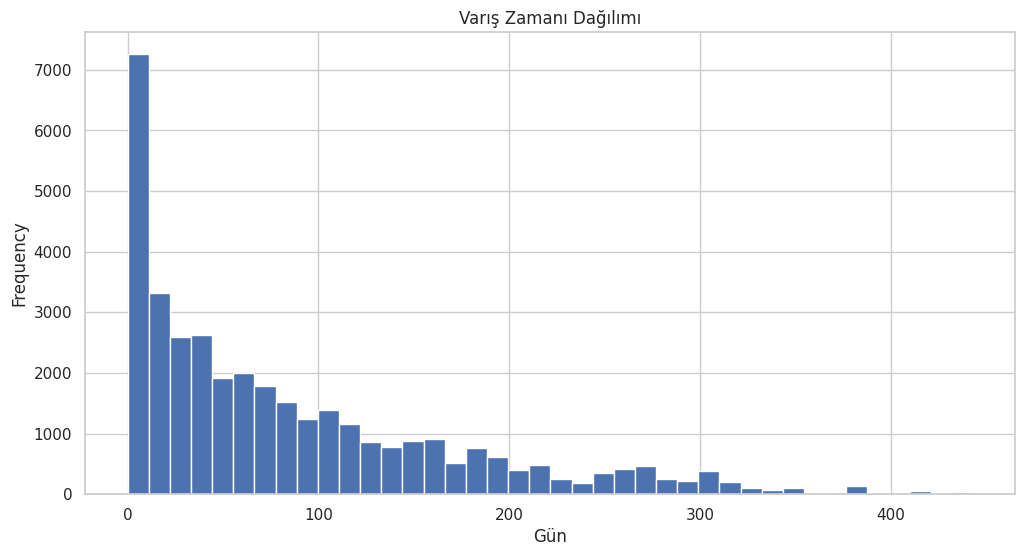

In [ ]:
# Rezervasyonun yapıldığı tarih ile otele giriş tarihi arasında geçen gün sayısı
df['lead_time'].plot(kind='hist', bins=40)
plt.title("Varış Zamanı Dağılımı")
plt.xlabel("Gün")
plt.show()

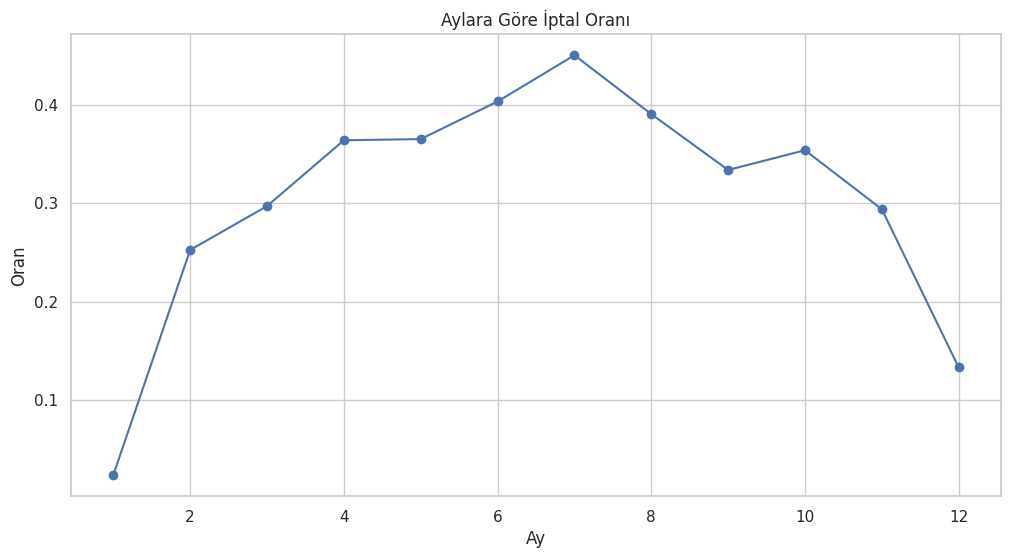

In [ ]:
# Aylara göre iptal oranı
monthly_cancel = (df.assign(is_cancel=(df['booking_status']=='Canceled').astype(int))
                    .groupby('arrival_month')['is_cancel'].mean())
monthly_cancel.plot(kind='line', marker='o')
plt.title("Aylara Göre İptal Oranı")
plt.xlabel("Ay")
plt.ylabel("Oran")
plt.show()

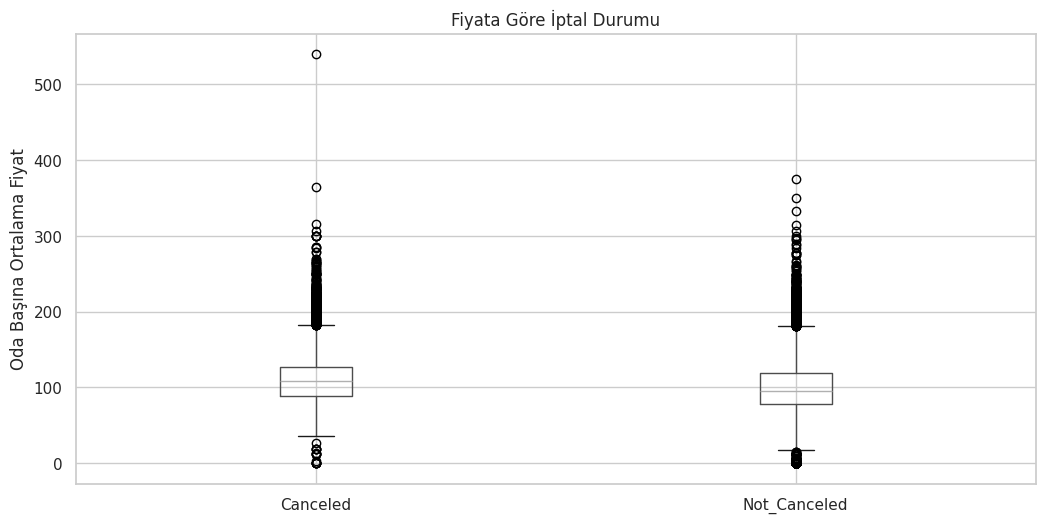

In [ ]:
# Fiyata göre iptal oranı
df.boxplot(column='avg_price_per_room', by='booking_status')
plt.suptitle("")
plt.title("Fiyata Göre İptal Durumu")
plt.xlabel("")
plt.ylabel("Oda Başına Ortalama Fiyat")
plt.show()

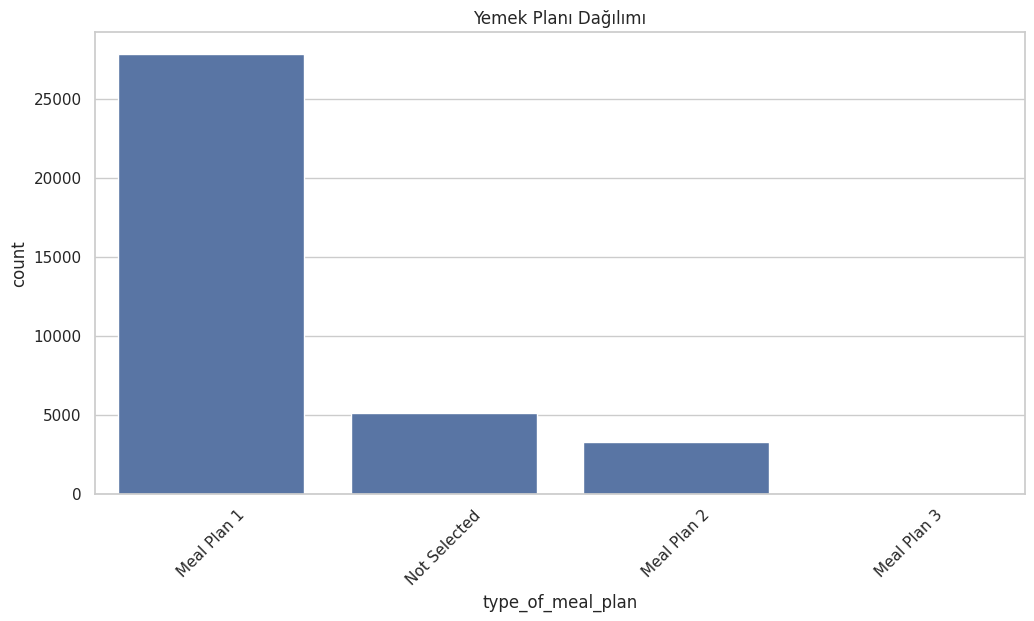

In [ ]:
# Yemek planı dağılımı
sns.countplot(data=df, x='type_of_meal_plan')
plt.title("Yemek Planı Dağılımı")
plt.xticks(rotation=45)
plt.show()

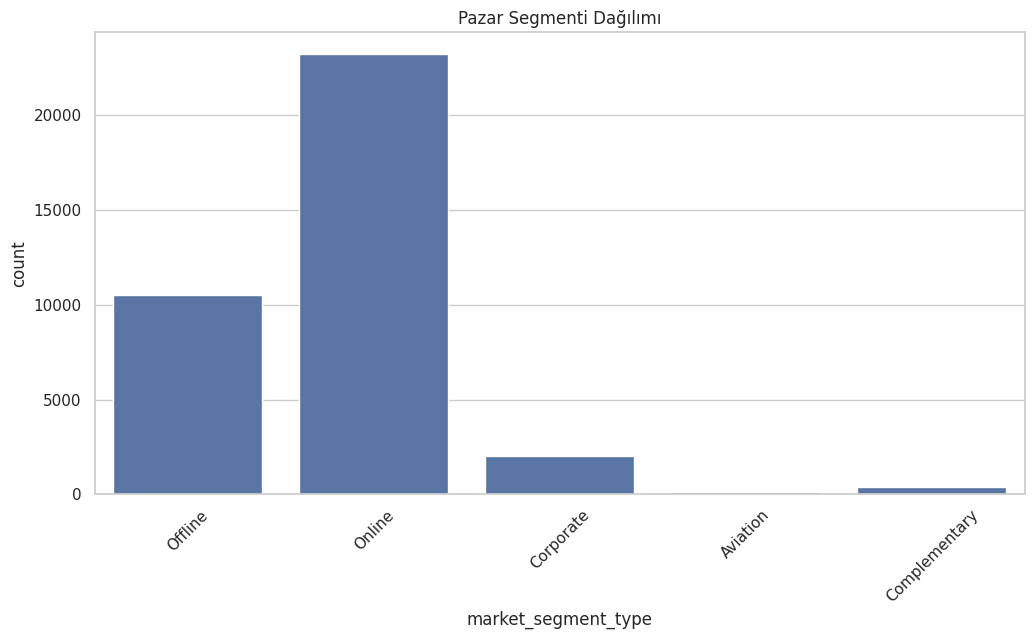

In [ ]:
# Pazar segmenti dağılımı
sns.countplot(data=df, x='market_segment_type')
plt.xticks(rotation=45)
plt.title("Pazar Segmenti Dağılımı")
plt.show()

# **Aykırı Değer Analizi**

Text(0.5, 1.0, 'Oda Fiyatı Aykırı Değerleri')

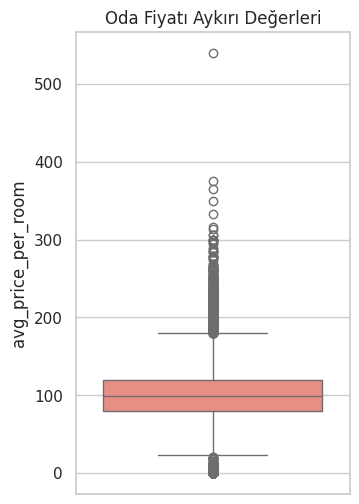

In [ ]:
# Oda fiyatları outlier
plt.subplot(1, 3, 1)
sns.boxplot(y=df['avg_price_per_room'], color='salmon')
plt.title('Oda Fiyatı Aykırı Değerleri')

Text(0.5, 1.0, 'Bekleme Süresi (Lead Time) Aykırı Değerleri')

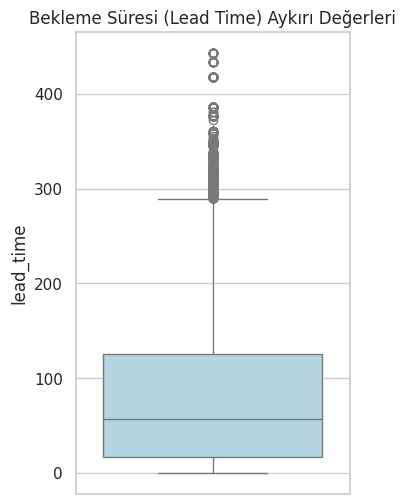

In [ ]:
# Bekleme süresi outlier
plt.subplot(1, 3, 2)
sns.boxplot(y=df['lead_time'], color='lightblue')
plt.title('Bekleme Süresi (Lead Time) Aykırı Değerleri')

Text(0.5, 1.0, 'Çocuk Sayısı Aykırı Değerleri')

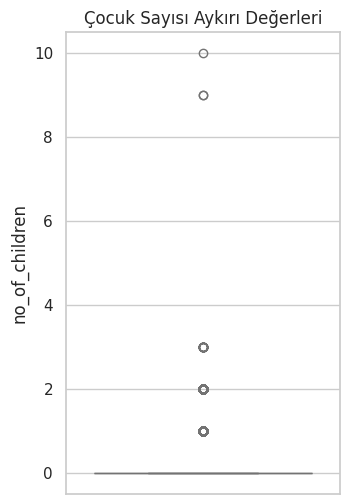

In [ ]:
# Çocuk sayısı outlier
plt.subplot(1, 3, 3)
sns.boxplot(y=df['no_of_children'], color='lightgreen')
plt.title('Çocuk Sayısı Aykırı Değerleri')

# **Feature Engineering**

In [ ]:
# Fiyatı 0 olan kayıtların temizlenmesi
zero_price = df[df['avg_price_per_room'] == 0]
print("Number of rows with a price of 0:", len(zero_price))
df = df[df['avg_price_per_room'] > 0]

Number of rows with a price of 0: 545


In [ ]:
# Model için gereksiz olan ID sütununun düşürülmesi
df = df.drop('Booking_ID', axis=1)

In [ ]:
# Toplam gece sayısı ve toplam kişi sayısı gibi yeni sütunlar ekleniyor
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']

# **Train-Test Split**

In [ ]:
# Hedef değişken ve bağımsız değişken
X = df.drop('booking_status', axis=1)
y = df['booking_status']
# Hedef değişkenin sayısal değere dönüştürülmesi
le = LabelEncoder()
y = le.fit_transform(y)
# Verinin %80 eğitim, %20 test olarak ayrılması(target dengesiz olduğu stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

# **Preprocessor**

In [ ]:
# Eğitim setindeki kategorik ve sayısal sütunların belirlenmesi
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [ ]:
# Sayısal veriler için Standartlaştırma (StandardScaler)
# Kategorik veriler için One-Hot Encoding (OneHotEncoder) işlemi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# **Gelişmiş Modeller**

In [ ]:
# Xgboost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
# ExtraTrees classifier
et_clf = ExtraTreesClassifier(random_state=42)
# Sparse matrisi dense matrise çevirir
to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, 'toarray') else x, accept_sparse=True)

In [ ]:
pipelines = {
    # Model 1: XGBoost
    '1-XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb_clf)
    ]),
    # Model 2: XGBoost + PCA
    '2-XGBoost + PCA': Pipeline([
        ('preprocessor', preprocessor),
        ('to_dense', to_dense),
        ('pca', PCA()),
        ('classifier', xgb_clf)
    ]),
    # Model 3: XGBoost + SelectKBest
    '3-XGBoost + SelectKBest': Pipeline([
        ('preprocessor', preprocessor),
        ('select', SelectKBest(score_func=f_classif)),
        ('classifier', xgb_clf)
    ]),
    # Model 4: ExtraTrees
    '4-ExtraTrees': Pipeline([
        ('preprocessor', preprocessor),
        ('to_dense', to_dense),
        ('classifier', et_clf)
    ]),
    # Model 5: ExtraTrees + PCA
    '5-ExtraTrees + PCA': Pipeline([
        ('preprocessor', preprocessor),
        ('to_dense', to_dense),
        ('pca', PCA()),
        ('classifier', et_clf)
    ]),
    # Model 6: ExtraTrees + SelectKBest
    '6-ExtraTrees + SelectKBest': Pipeline([
        ('preprocessor', preprocessor),
        ('to_dense', to_dense),
        ('select', SelectKBest(score_func=f_classif)),
        ('classifier', et_clf)
    ])
}

# **Parameter Tuning**

In [ ]:
param_grids = {
    '1-XGBoost': {
        'classifier__n_estimators': [300, 400, 500],
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [5, 10, 15]
    },
    '2-XGBoost + PCA': {
        'pca__n_components': [20, 25],
        'classifier__n_estimators': [300, 400, 500],
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [5, 10, 15]
    },
    '3-XGBoost + SelectKBest': {
        'select__k': [20, 25],
        'classifier__n_estimators': [300, 400, 500],
        'classifier__learning_rate': [0.1],
        'classifier__max_depth': [5, 10, 15]
    },
    '4-ExtraTrees': {
        'classifier__n_estimators': [300, 400, 500],
        'classifier__max_depth': [5, 10, 15]
    },
    '5-ExtraTrees + PCA': {
        'pca__n_components': [20, 25],
        'classifier__n_estimators': [300, 400, 500],
        'classifier__max_depth': [5, 10, 15]
    },
    '6-ExtraTrees + SelectKBest': {
        'select__k': [20, 25],
        'classifier__n_estimators': [300, 400, 500],
        'classifier__max_depth': [5, 10, 15]
    }
}

# **Cross Validation ile Modelleri Eğitme**

In [ ]:
results = {}
for name, pipeline in pipelines.items():
    print(f"--- {name} Eğitiliyor ---")

    grid = param_grids.get(name)

    if grid:
        # GridSearchCV ile 3 katmanlı doğrulama
        gs = GridSearchCV(pipeline, grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

        # Modelleri eğit
        gs.fit(X_train, y_train)

        # Sonuçları kaydet
        results[name] = {
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'best_model': gs.best_estimator_
        }
        print(f"En iyi skor: {gs.best_score_:.4f}")
        print(f"En iyi parametreler: {gs.best_params_}\n")
    else:
        print(f"{name} için parametre grid'i bulunamadı!")

--- 1-XGBoost Eğitiliyor ---
Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:33:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


En iyi skor: 0.9214
En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 300}

--- 2-XGBoost + PCA Eğitiliyor ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


En iyi skor: 0.9104
En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 500, 'pca__n_components': 20}

--- 3-XGBoost + SelectKBest Eğitiliyor ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:41:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


En iyi skor: 0.9169
En iyi parametreler: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 400, 'select__k': 25}

--- 4-ExtraTrees Eğitiliyor ---
Fitting 3 folds for each of 9 candidates, totalling 27 fits
En iyi skor: 0.9026
En iyi parametreler: {'classifier__max_depth': 15, 'classifier__n_estimators': 400}

--- 5-ExtraTrees + PCA Eğitiliyor ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits
En iyi skor: 0.8967
En iyi parametreler: {'classifier__max_depth': 15, 'classifier__n_estimators': 500, 'pca__n_components': 25}

--- 6-ExtraTrees + SelectKBest Eğitiliyor ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits
En iyi skor: 0.9019
En iyi parametreler: {'classifier__max_depth': 15, 'classifier__n_estimators': 500, 'select__k': 25}



# **Model Performansları**

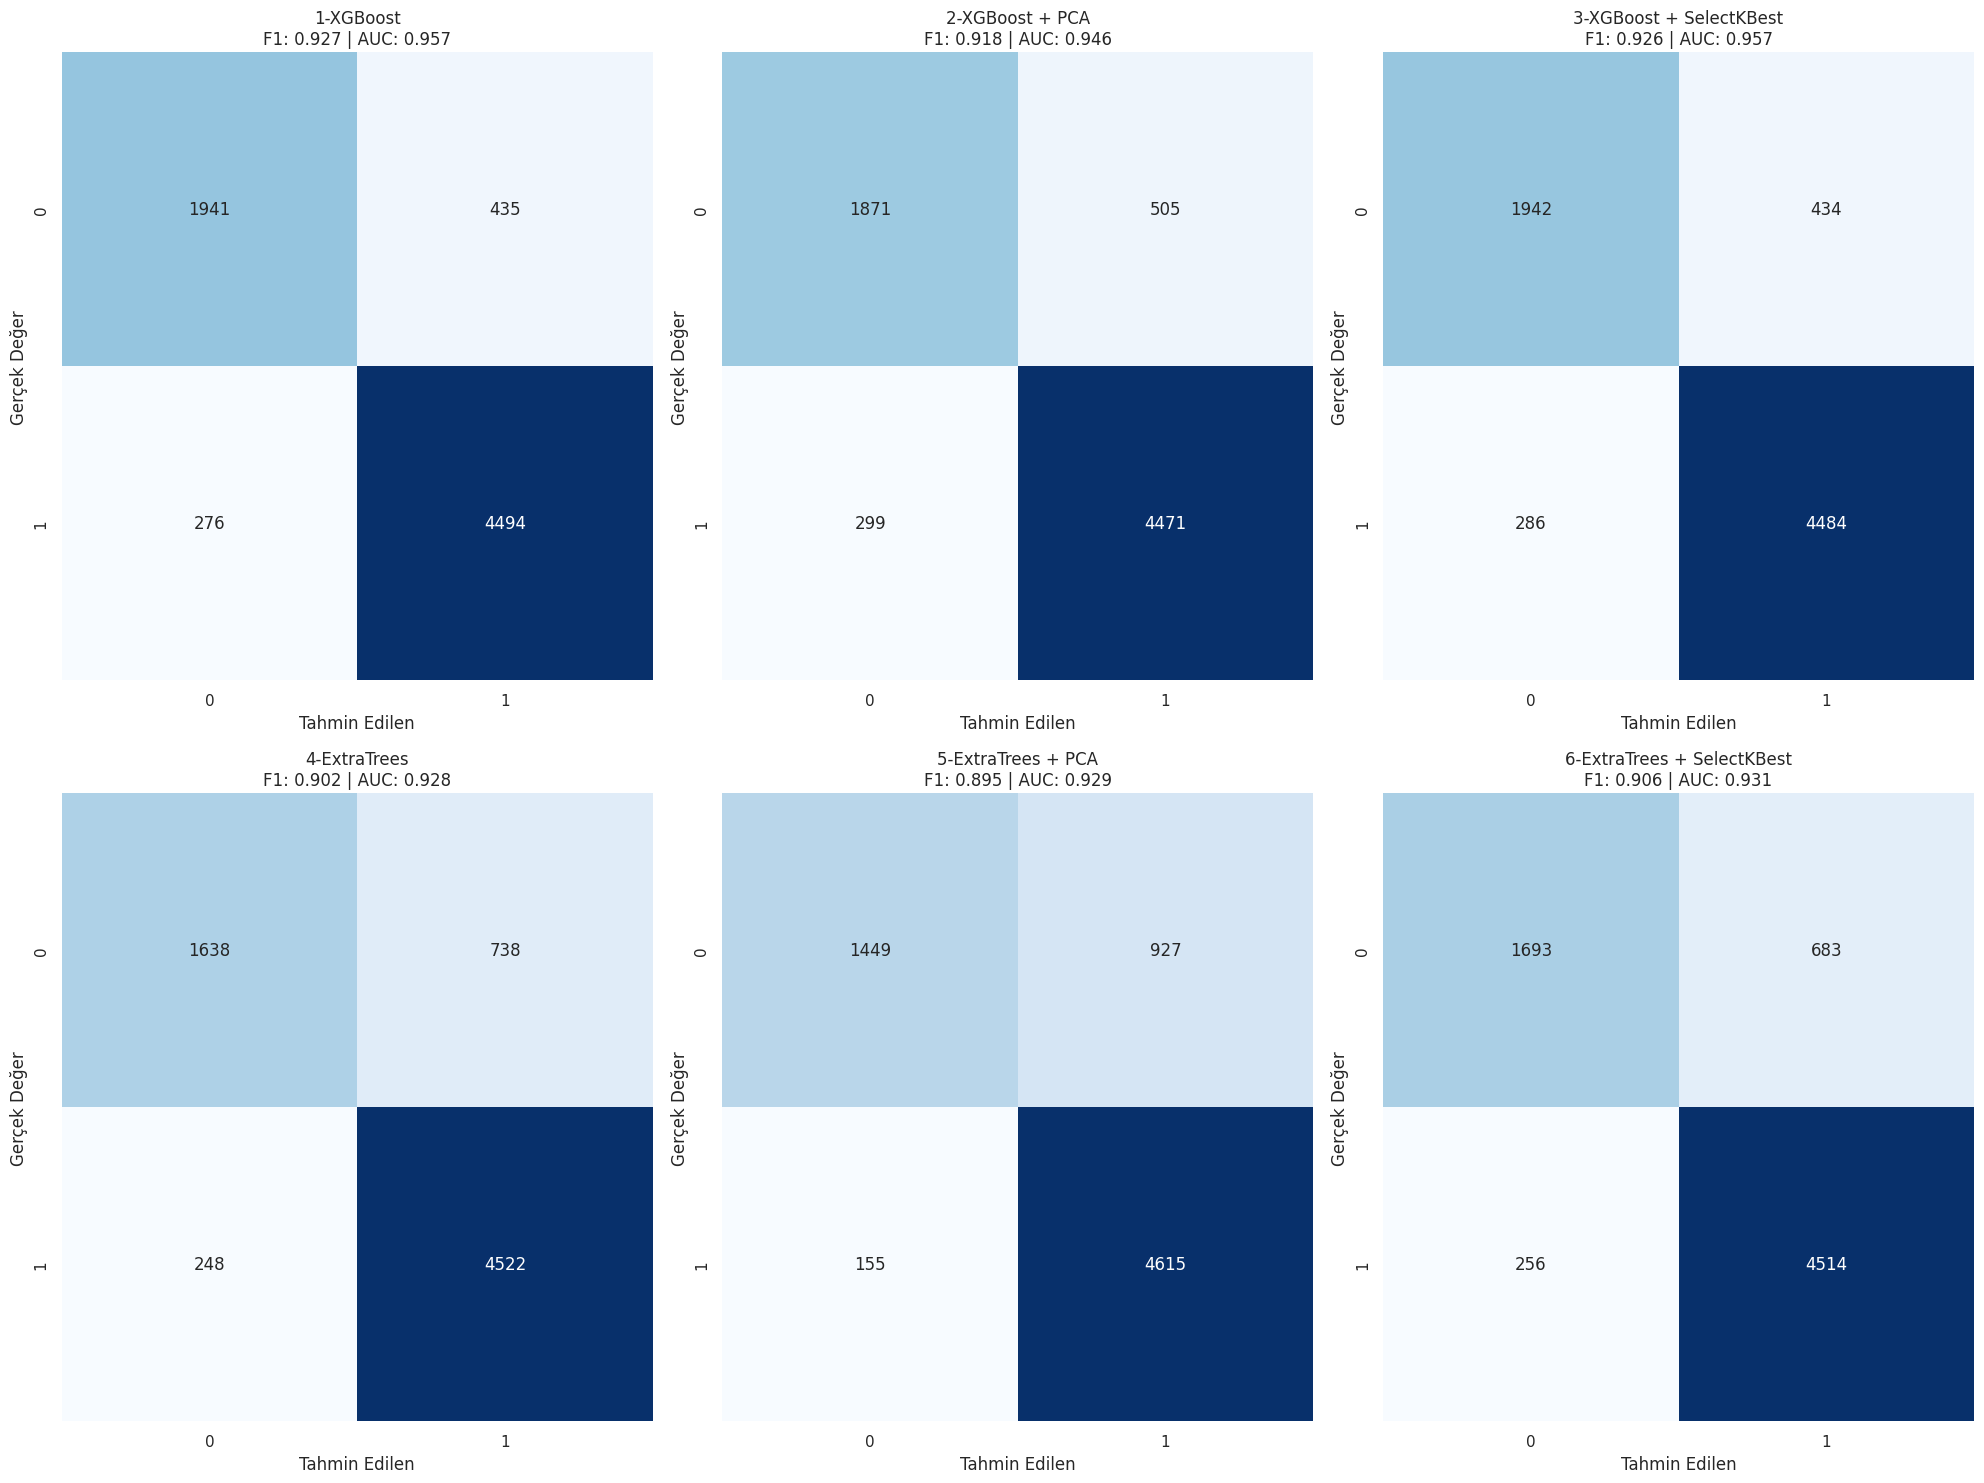

In [ ]:
metrics_list = []

# Şekil boyutu ayarla
plt.figure(figsize=(20, 15))

for i, (name, result_data) in enumerate(results.items()):
    best_model = result_data['best_model']

    # Tahmin Yap
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] # ROC-AUC için sınıf olasılığı (pozitif sınıf)

    # Metriklerin Hesaplanması
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Listeye ekleme
    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Subplot ayarı
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}\nF1: {f1:.3f} | AUC: {auc:.3f}")
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen')

plt.tight_layout()
plt.show()

In [ ]:
# Tablo Görselleştirilmesi
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.round(4)
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,1-XGBoost,0.9005,0.9117,0.9421,0.9267,0.9573
2,3-XGBoost + SelectKBest,0.8992,0.9118,0.9400,0.9257,0.9573
1,2-XGBoost + PCA,0.8875,0.8985,0.9373,0.9175,0.9456
5,6-ExtraTrees + SelectKBest,0.8686,0.8686,0.9463,0.9058,0.9313
3,4-ExtraTrees,0.8620,0.8597,0.9480,0.9017,0.9278
4,5-ExtraTrees + PCA,0.8486,0.8327,0.9675,0.8951,0.9289


# **Sınıf Bazlı Başarım Tablosu**

In [ ]:
table_data = []

# Modeller üzerinde döngü kurarak sonuçları topluyoruz
for name, result_data in results.items():
    best_model = result_data['best_model']

    # Test seti üzerinde tahmin işlemleri
    y_pred = best_model.predict(X_test)

    # ROC-AUC hesaplaması için olasılık değerlerinin alınması
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_prob)
    else:
        auc_score = 0

    # Her sınıf için ayrı metrikleri içeren raporu sözlük formatında alıyoruz
    report = classification_report(y_test, y_pred, output_dict=True)

    # NO verilerinin listeye eklenmesi
    table_data.append({
        'Sınıf (Grup)': 'NO',
        'Model': name,
        'F1 Score': report['0']['f1-score'],
        'Precision': report['0']['precision'],
        'Recall': report['0']['recall'],
        'Genel ROC AUC': auc_score
    })

    # YES verilerinin listeye eklenmesi
    table_data.append({
        'Sınıf (Grup)': 'YES',
        'Model': name,
        'F1 Score': report['1']['f1-score'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'Genel ROC AUC': auc_score
    })

# Verileri DataFrame formatına çeviriyoruz
df_table = pd.DataFrame(table_data)

# Tabloyu önce Sınıf grubuna, sonra Model ismine göre sıralıyoruz.
df_table = df_table.sort_values(by=['Sınıf (Grup)', 'Model'])

# Tabloyu hiyerarşik yapıya dönüştürüyoruz
df_grouped = df_table.set_index(['Sınıf (Grup)', 'Model'])

# Sütunları önem sırasına göre düzenliyoruz
df_grouped = df_grouped[['F1 Score', 'Precision', 'Recall', 'Genel ROC AUC']]

# Tabloyu görselleştirme (Styling)
# F1 skoruna göre yeşil tonlarında renklendirme ve format ayarları
styled_view = df_grouped.style.format("{:.4f}")\
    .background_gradient(cmap='Greens', subset=['F1 Score'])\
    .set_properties(**{'text-align': 'center', 'border-color': 'black'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12px'), ('text-align', 'left'), ('vertical-align', 'middle')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '14px'), ('font-weight', 'bold')]}
    ])\
    .set_caption("Sınıf Bazlı Model Performans Karşılaştırması")

display(styled_view)

# **ROC Curve**

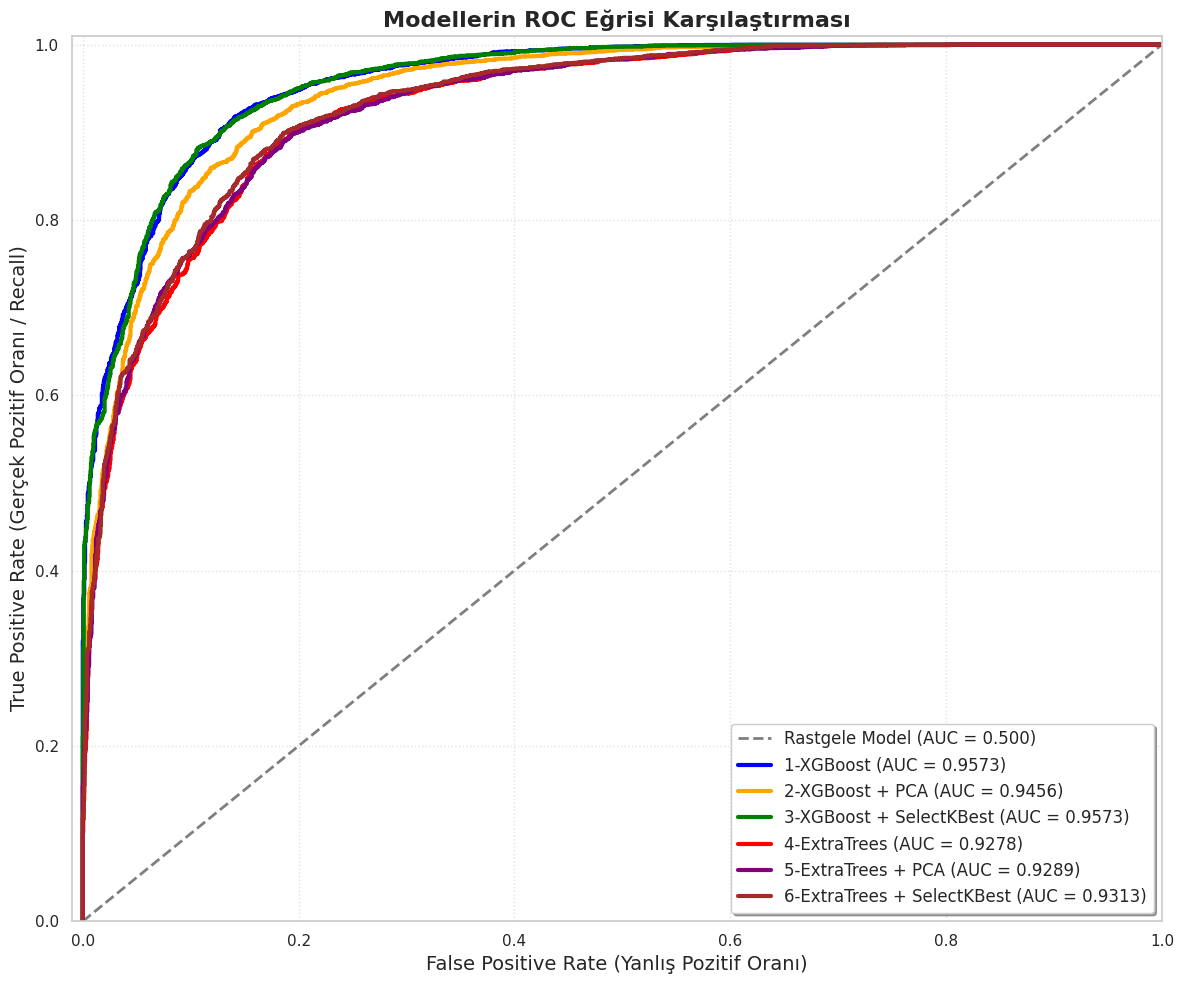

In [ ]:
plt.figure(figsize=(12, 10))

# Rastgele tahmin çizgisini ekle
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Rastgele Model (AUC = 0.500)', alpha=0.5)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown'] # Her model için farklı renk

for i, (name, result_data) in enumerate(results.items()):
    best_model = result_data['best_model']

    # ROC eğrisi için sınıf olasılıkları
    if hasattr(best_model, "predict_proba"):
        # Sadece pozitif sınıfın (1) olasılığını al
        y_prob = best_model.predict_proba(X_test)[:, 1]

        # FPR, TPR ve Threshold değerlerinin hesaplanması
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        # AUC skorunu hesapla
        auc_score = roc_auc_score(y_test, y_prob)

        # Eğriyi çiz
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=3,
                 label=f'{name} (AUC = {auc_score:.4f})')
    else:
        print(f"UYARI: {name} modeli olasılık üretemiyor (predict_proba yok), ROC çizilemedi.")

# Grafik Ayarları
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)', fontsize=14)
plt.ylabel('True Positive Rate (Gerçek Pozitif Oranı / Recall)', fontsize=14)
plt.title('Modellerin ROC Eğrisi Karşılaştırması', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12, frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()